In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
df=pd.read_csv(r"C:\Users\muhai\Desktop\QC\framingham.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [4]:
df=pd.read_csv(r"C:\Users\muhai\Desktop\QC\framingham.csv")

# Step 1: Check which columns have NaN values
na_columns = df.isna().sum()

# Step 2: Filter columns that have NaN values
columns_with_na = na_columns[na_columns > 0]

print(columns_with_na)

education     105
cigsPerDay     29
BPMeds         53
totChol        50
BMI            19
heartRate       1
glucose       388
dtype: int64


In [10]:
na_columns = df.isna().sum()

# Step 2: Filter columns that have NaN values
columns_with_na = na_columns[na_columns > 0]

print(columns_with_na)

Series([], dtype: int64)


In [9]:
columns_with_na = ['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose']

# Fill NaN values with the median of each respective column
df[columns_with_na] = df[columns_with_na].apply(lambda col: col.fillna(col.median()))

# Save the updated DataFrame to a new CSV file
df.to_csv('updated_file.csv', index=False)
df=pd.read_csv(r"updated_file.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,78.0,0


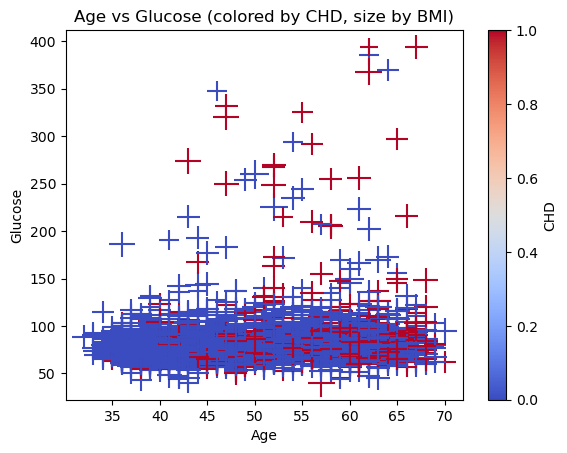

In [16]:
plt.scatter(df['age'], df['glucose'], c=df['TenYearCHD'], s=df['BMI']*10, marker='+', cmap='coolwarm')

plt.xlabel('Age')
plt.ylabel('Glucose')
plt.title('Age vs Glucose (colored by CHD, size by BMI)')
plt.colorbar(label='CHD')
plt.show()


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define features and target
X = df.drop(columns=['TenYearCHD'])
y = df['TenYearCHD']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8529874213836478
[[1079    5]
 [ 182    6]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1084
           1       0.55      0.03      0.06       188

    accuracy                           0.85      1272
   macro avg       0.70      0.51      0.49      1272
weighted avg       0.81      0.85      0.79      1272



C:\Users\muhai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [20]:
X_test


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
3188,1,63,1.0,0,0.0,0.0,0,1,0,190.0,148.0,90.0,27.13,72.0,86.0
764,1,45,3.0,0,0.0,0.0,0,0,0,162.0,125.0,89.0,27.98,85.0,83.0
3264,0,51,1.0,1,2.0,0.0,0,0,0,261.0,127.0,81.0,20.24,75.0,96.0
1967,1,45,3.0,1,30.0,0.0,0,0,0,250.0,126.0,89.5,28.68,75.0,92.0
2185,0,45,2.0,1,3.0,0.0,0,0,0,250.0,130.0,80.0,20.24,90.0,86.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,1,55,2.0,1,15.0,0.0,0,1,0,222.0,155.0,92.5,28.35,67.0,68.0
570,0,49,3.0,1,3.0,0.0,0,0,0,247.0,121.0,82.0,29.07,72.0,69.0
343,1,43,4.0,1,25.0,0.0,0,0,0,245.0,126.0,88.5,23.16,92.0,78.0
2159,0,42,3.0,1,15.0,0.0,0,0,0,212.0,115.0,72.0,23.72,73.0,100.0


In [22]:
model.score(X_test,y_test)

0.8529874213836478

In [23]:
model.predict_proba(X_test)

array([[0.65952811, 0.34047189],
       [0.92956305, 0.07043695],
       [0.82422564, 0.17577436],
       ...,
       [0.94565303, 0.05434697],
       [0.88825119, 0.11174881],
       [0.93848503, 0.06151497]])

In [26]:
risk_counts = df['TenYearCHD'].value_counts()

# Display the results
print("Counts of individuals at risk and not at risk:")
print(risk_counts)

# If you want to display them as a dictionary
risk_dict = {'At Risk (1)': risk_counts.get(1, 0), 'Not At Risk (0)': risk_counts.get(0, 0)}
print(risk_dict)

Counts of individuals at risk and not at risk:
0    3594
1     644
Name: TenYearCHD, dtype: int64
{'At Risk (1)': 644, 'Not At Risk (0)': 3594}


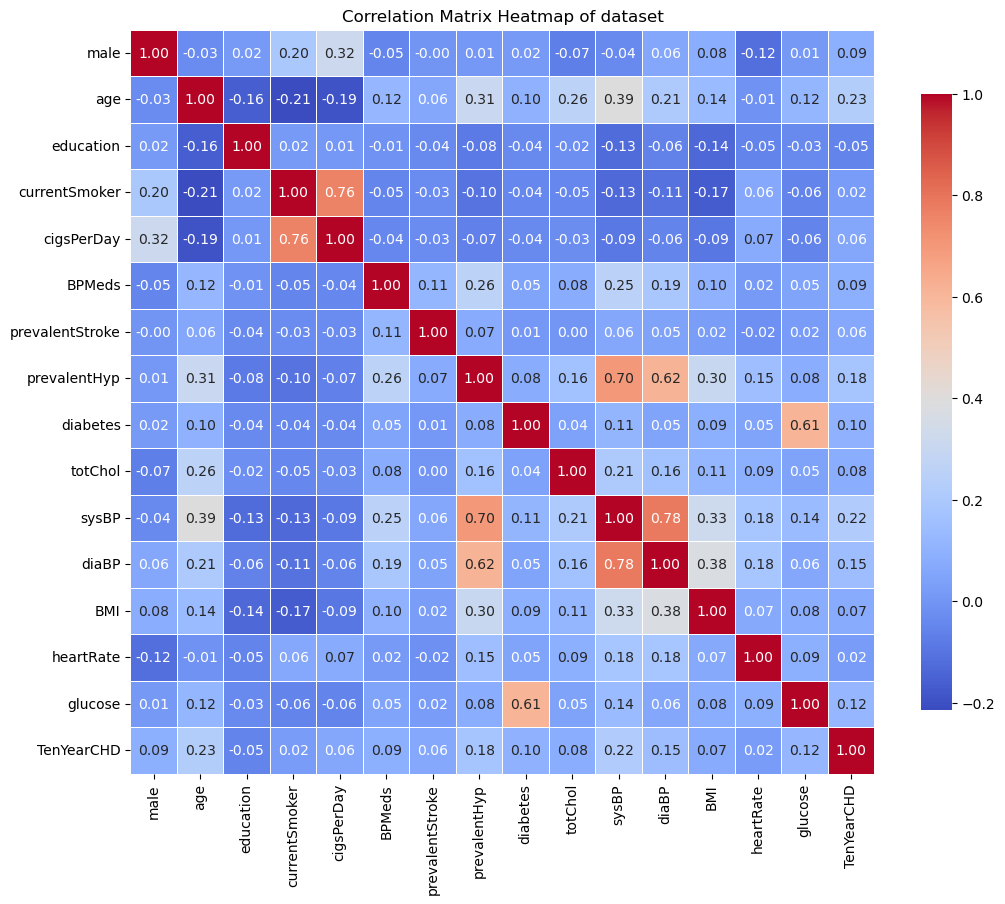

In [27]:
import seaborn as sns
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create the heatmap
sns.heatmap(correlation_matrix, 
            annot=True,          # Show the correlation coefficients on the heatmap
            fmt=".2f",          # Format for the annotation
            cmap='coolwarm',    # Color map to use
            square=True,        # Make each cell square-shaped
            linewidths=.5,      # Width of the lines that will divide each cell
            cbar_kws={"shrink": .8})  # Color bar size

# Set titles and labels
plt.title('Correlation Matrix Heatmap of dataset')
plt.show()

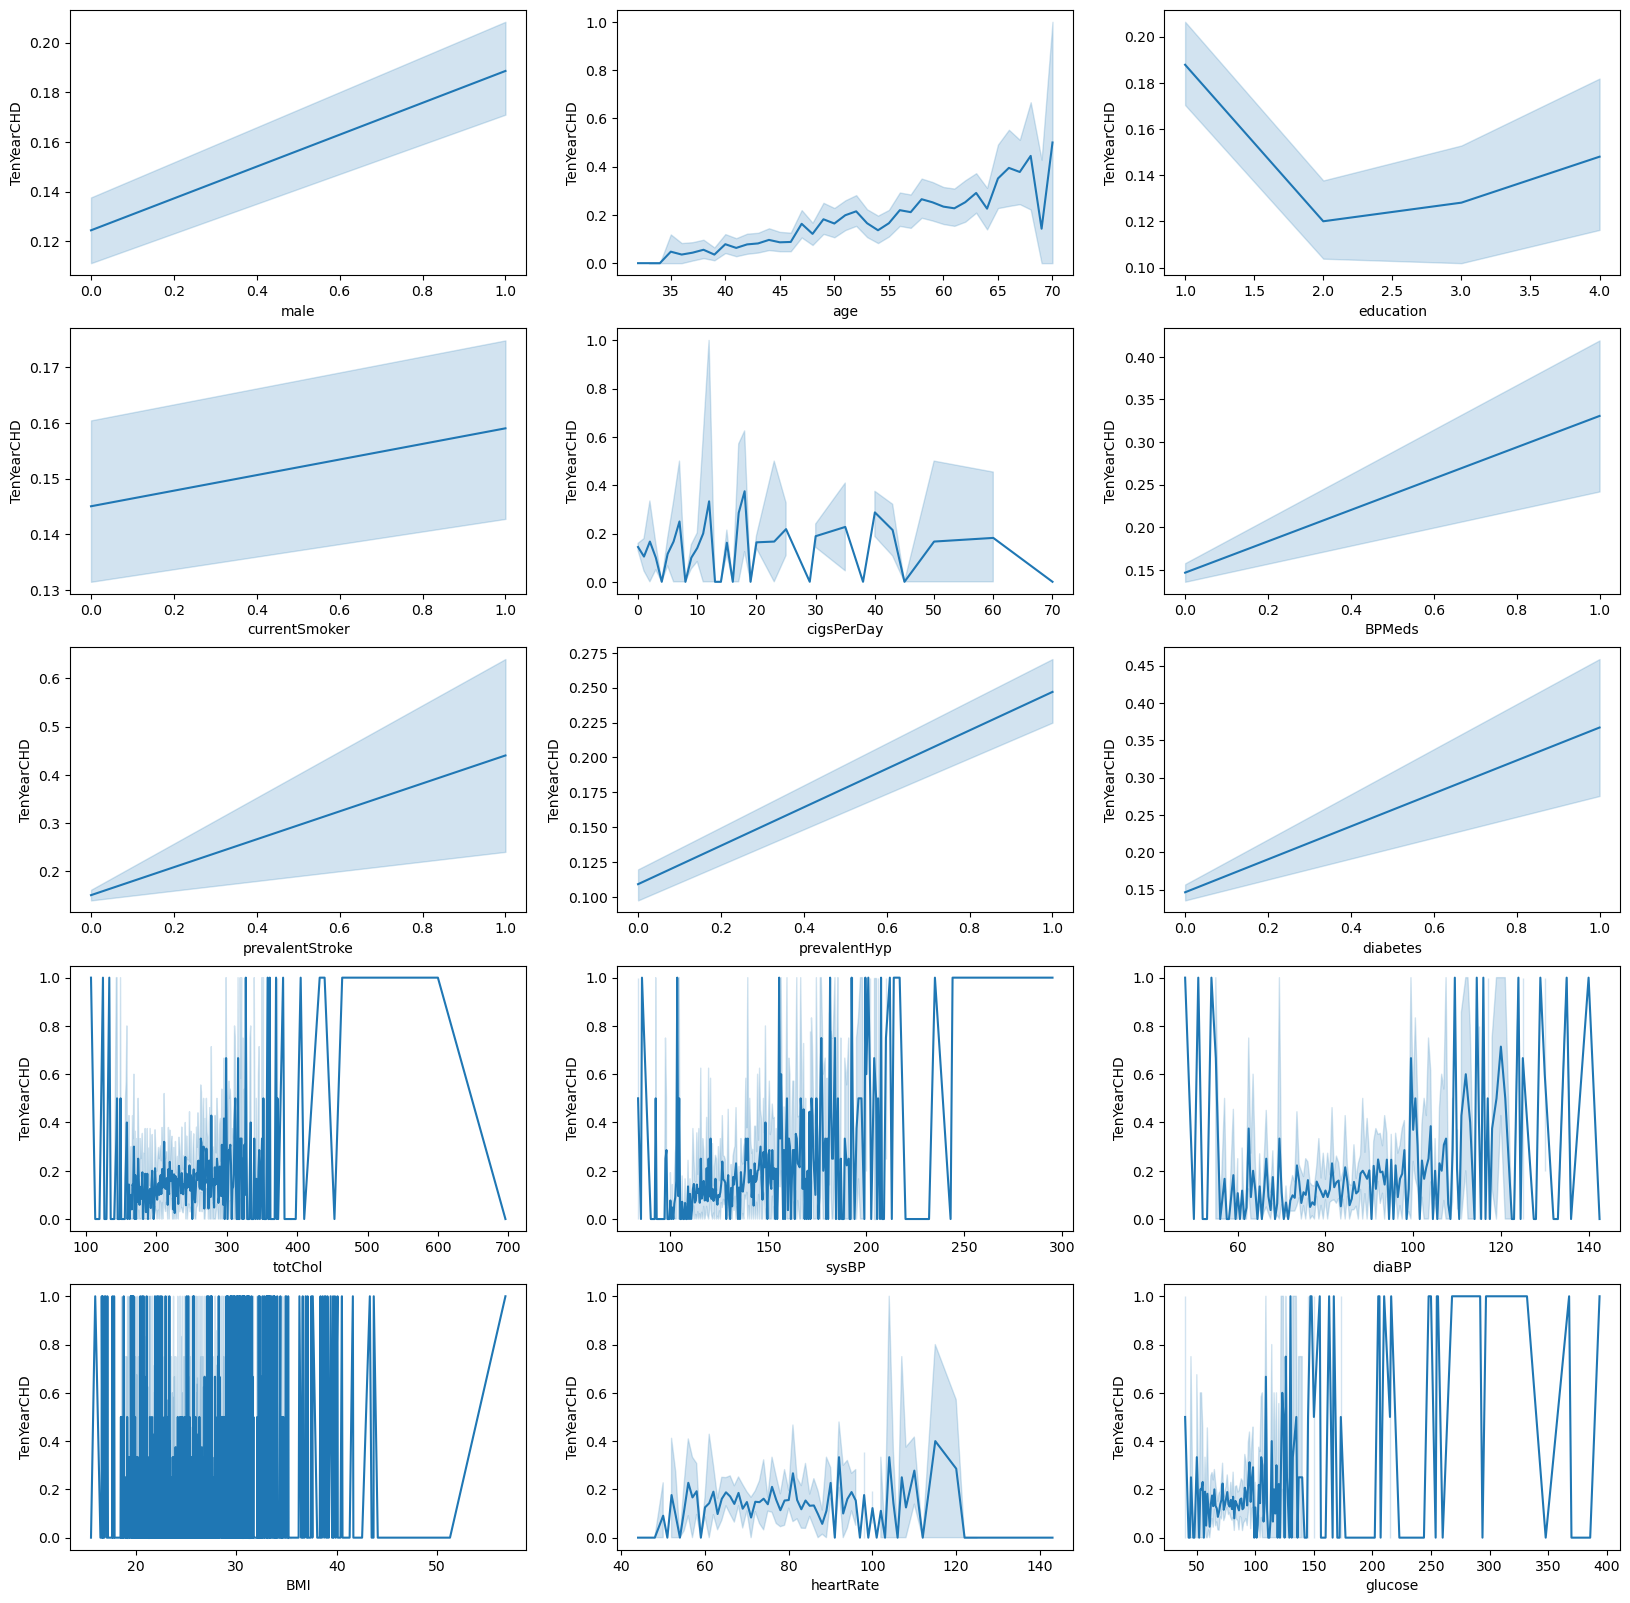

In [28]:
#Plotting TenYearCHD vs each feature individually to check if the high importance features suggested by correlation matrix are correct or not
f, axes = plt.subplots(5, 3, figsize=(20, 20))
cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
cols = cols[:len(cols) - 1]
j = 0
k = 0
for i, col in enumerate(cols):
    #print(f"{i},{j},{k}")
    sns.lineplot(x=col, y="TenYearCHD", data=df, ax=axes[j ,k])
    k = (k + 1) % 3
    if k == 0 and i != 0:
        j += 1 